# Klasifikasi Gambar (Biometric - Palm)



```
# Villeneuve Andhira Suwandhi (2108067)
# Universitas Pendidikan Indonesia [IK585 - Financial Technology]
```



In [ ]:
# import library
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

In [ ]:
# direktori dataset
url_dir = "/content/drive/Othercomputers/My Laptop/7/IK585-Financial_Technology/_code/prototype-palm/ROI/session1"
# url_dir = "D:/vil/Documents/Kuliah/_Semester/7/IK585-Financial_Technology/_code/prototype-palm/ROI/session1"

# init dataset
data_dir = pathlib.Path(url_dir)

In [ ]:
# jumlah instance dataset
image_count = len(list(data_dir.glob('*/*.bmp')))
print(image_count)

6000


In [ ]:
list_dir = [os.path.basename(x) for x in data_dir.iterdir() if x.is_dir()]
print("Jumlah class: {} ".format(len(list_dir)))
print("Jumlah instance per class")
for x in list_dir:
  print("{} = {}".format(x,len(list(data_dir.glob('{}/*.bmp'.format(x))))))

Jumlah class: 600 
Jumlah instance per class
palm1 = 10
palm2 = 10
palm3 = 10
palm4 = 10
palm5 = 10
palm6 = 10
palm7 = 10
palm8 = 10
palm9 = 10
palm10 = 10
palm11 = 10
palm12 = 10
palm13 = 10
palm14 = 10
palm15 = 10
palm16 = 10
palm17 = 10
palm18 = 10
palm19 = 10
palm20 = 10
palm21 = 10
palm22 = 10
palm23 = 10
palm24 = 10
palm25 = 10
palm26 = 10
palm27 = 10
palm28 = 10
palm29 = 10
palm30 = 10
palm31 = 10
palm32 = 10
palm33 = 10
palm34 = 10
palm35 = 10
palm36 = 10
palm37 = 10
palm38 = 10
palm39 = 10
palm40 = 10
palm41 = 10
palm42 = 10
palm43 = 10
palm44 = 10
palm45 = 10
palm46 = 10
palm47 = 10
palm48 = 10
palm49 = 10
palm50 = 10
palm51 = 10
palm52 = 10
palm53 = 10
palm54 = 10
palm55 = 10
palm56 = 10
palm57 = 10
palm58 = 10
palm59 = 10
palm60 = 10
palm61 = 10
palm62 = 10
palm63 = 10
palm64 = 10
palm65 = 10
palm66 = 10
palm67 = 10
palm68 = 10
palm69 = 10
palm70 = 10
palm71 = 10
palm72 = 10
palm73 = 10
palm74 = 10
palm75 = 10
palm76 = 10
palm77 = 10
palm78 = 10
palm79 = 10
palm80 = 10
palm

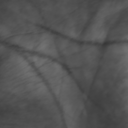

In [ ]:
# cek salah satu gambar
train = list(data_dir.glob('palm1/*'))
PIL.Image.open(str(train[0]))

In [ ]:
# init
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# siapkan data training
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)

Found 6000 files belonging to 600 classes.
Using 4800 files for training.


In [ ]:
# siapkan data validasi
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)

Found 6000 files belonging to 600 classes.
Using 1200 files for validation.


In [ ]:
# melihat nama kelas
class_names = train_ds.class_names
print(class_names)

['palm1', 'palm10', 'palm100', 'palm101', 'palm102', 'palm103', 'palm104', 'palm105', 'palm106', 'palm107', 'palm108', 'palm109', 'palm11', 'palm110', 'palm111', 'palm112', 'palm113', 'palm114', 'palm115', 'palm116', 'palm117', 'palm118', 'palm119', 'palm12', 'palm120', 'palm121', 'palm122', 'palm123', 'palm124', 'palm125', 'palm126', 'palm127', 'palm128', 'palm129', 'palm13', 'palm130', 'palm131', 'palm132', 'palm133', 'palm134', 'palm135', 'palm136', 'palm137', 'palm138', 'palm139', 'palm14', 'palm140', 'palm141', 'palm142', 'palm143', 'palm144', 'palm145', 'palm146', 'palm147', 'palm148', 'palm149', 'palm15', 'palm150', 'palm151', 'palm152', 'palm153', 'palm154', 'palm155', 'palm156', 'palm157', 'palm158', 'palm159', 'palm16', 'palm160', 'palm161', 'palm162', 'palm163', 'palm164', 'palm165', 'palm166', 'palm167', 'palm168', 'palm169', 'palm17', 'palm170', 'palm171', 'palm172', 'palm173', 'palm174', 'palm175', 'palm176', 'palm177', 'palm178', 'palm179', 'palm18', 'palm180', 'palm181'

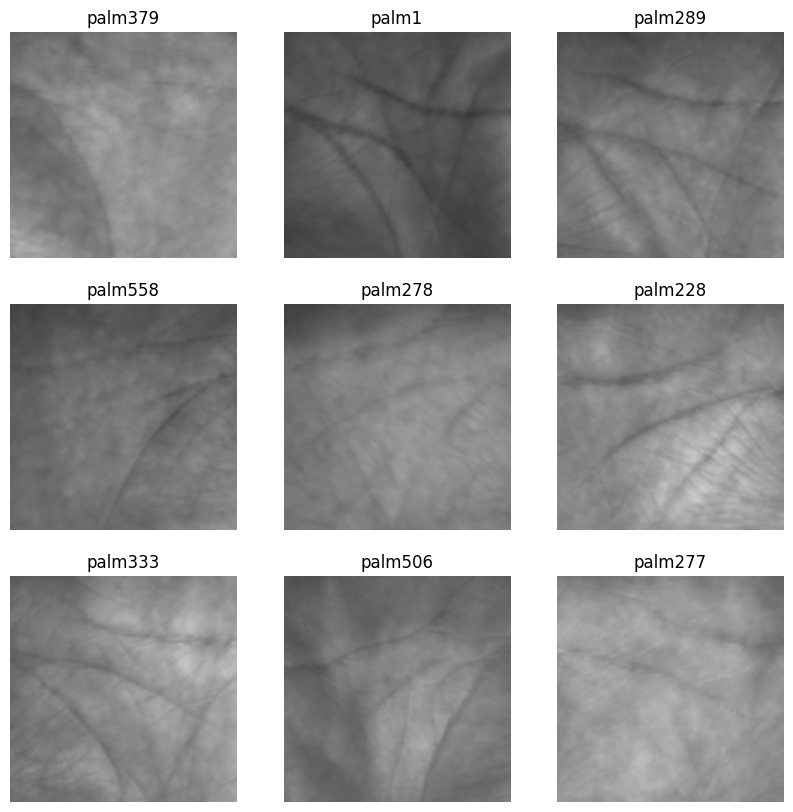

In [ ]:
# lihat dataset training
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1) # 3 baris, 3 kolom
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# shape dimensi data
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

# hasil: (batch, ukuran gambar [width x height], channel RGB)

(32, 180, 180, 3)
(32,)


In [ ]:
# cache buffer
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# normalisasi nilai RGB
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))

0.25886714 0.64989114


In [ ]:
# model deep learning (CNN)
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Conv2D: (16 [jumlah filter], 3 [ukuran filter], [nilai padding], [fungsi aktivasi])
# MaxPooling2D: [reduksi dimensi mengurangi overfitting]
# Flatten: [meratakan ulang shape]
# dense: [menghubungkan nodes]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# ringkasan arsitektur
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 600)                 │          77,400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,066,040 (15.51 MB)

 Trainable params: 4,066,040 (15.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train model
epochs=10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0012 - loss: 6.3917 - val_accuracy: 0.0000e+00 - val_loss: 6.4287
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 7.4724e-04 - loss: 6.3907 - val_accuracy: 0.0000e+00 - val_loss: 6.4309
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0017 - loss: 6.3921 - val_accuracy: 0.0000e+00 - val_loss: 6.4331
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0012 - loss: 6.3902 - val_accuracy: 0.0000e+00 - val_loss: 6.4353
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0016 - loss: 6.3905 - val_accuracy: 0.0000e+00 - val_loss: 6.4374
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0030 - loss: 6.3895 - val_accuracy: 0.0000e+00 - val_loss: 6.4395
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0034 - loss: 6.3898 - val_accuracy: 0.0000e+00 - val_loss: 6.4414
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 

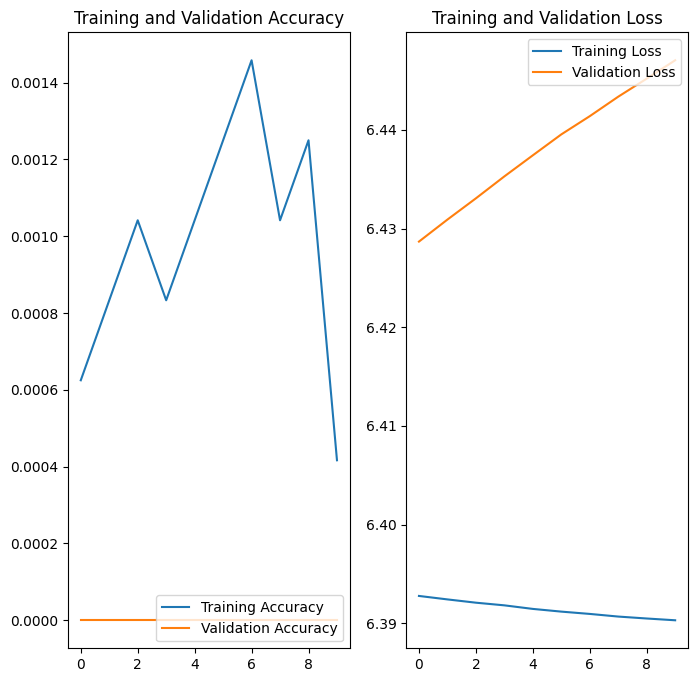

In [ ]:
# plot hasil training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# augmentasi data (untuk overfitting)
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


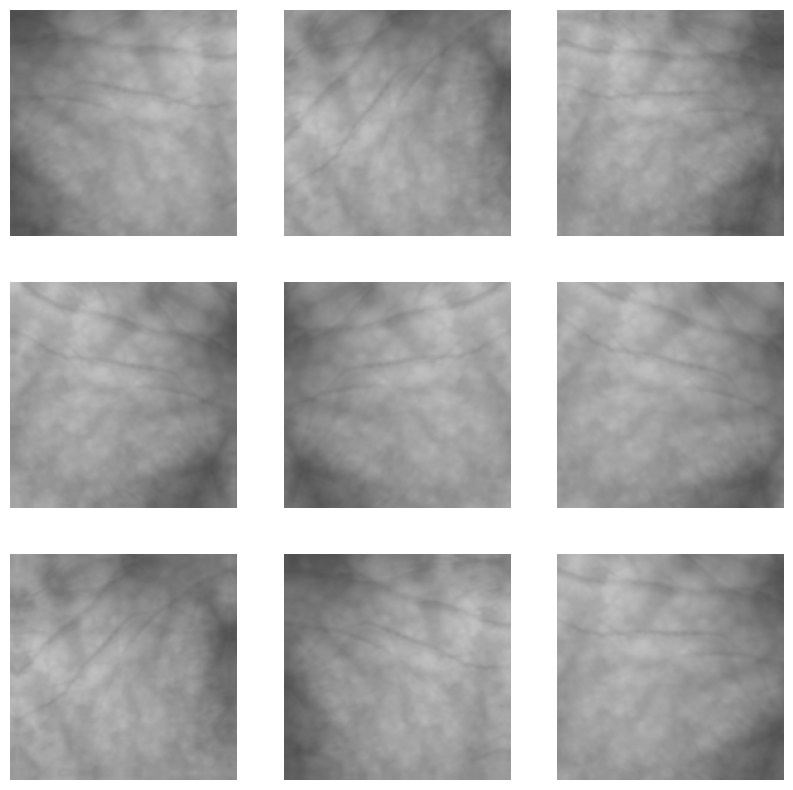

In [ ]:
# test evaluasi (visualisasi)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# evaluasi model
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

# Dropout: [mengurangi overfitting, random probabilitas input nilai 0 saat update bobot]

In [ ]:
# re-compile
model.compile(
    optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
epochs = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.0164 - loss: 5.6610 - val_accuracy: 0.0092 - val_loss: 5.6655
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.0196 - loss: 5.3894 - val_accuracy: 0.0125 - val_loss: 5.4585
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.0249 - loss: 5.1647 - val_accuracy: 0.0250 - val_loss: 5.2688
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.0394 - loss: 4.9589 - val_accuracy: 0.0417 - val_loss: 4.9189
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.0524 - loss: 4.7223 - val_accuracy: 0.0483 - val_loss: 4.7341
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.0760 - loss: 4.5222 - val_accuracy: 0.0817 - val_loss: 4.5981
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.0935 - loss: 4.3291 - val_accuracy: 0.0958 - val_loss: 4.4360
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.1027 - loss: 4.1678 - val_accu

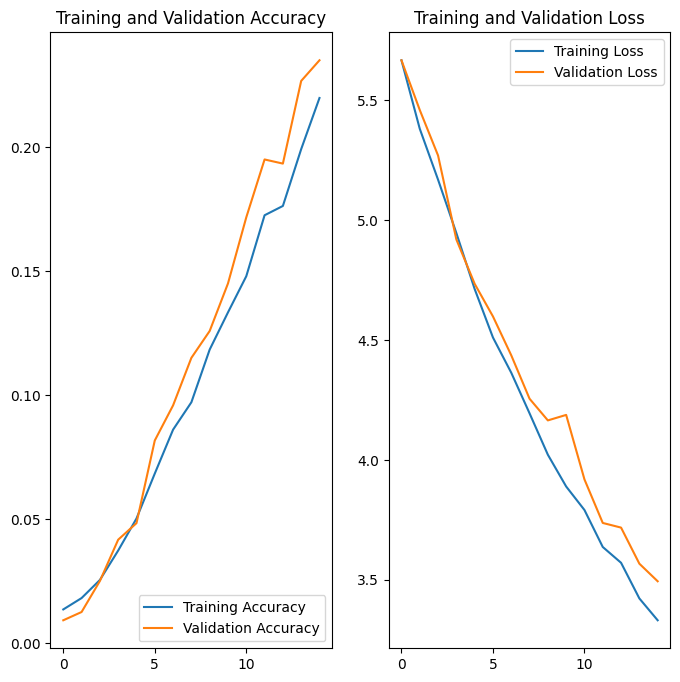

In [ ]:
# visualisasi (plot)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Perbaikan & Evaluasi Model

In [ ]:
# Model
num_classes = len(class_names)
model = Sequential(name="Coba-coba")
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3), name="input"))

model.add(layers.Conv2D(64, 3, padding='same', activation='relu', name="conv2d_1"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64, 3, padding='same', activation='relu', name="conv2d_2"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(128, 3, padding='same', activation='relu', name="conv2d_3"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())

model.add(layers.Flatten(name="flatten"))

model.add(layers.Dense(256, activation='relu', name="hidden"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, name="output"))

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

Model: "Coba-coba"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Rescaling)                    │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 180, 180, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 90, 90, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 45, 45, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_1 (Dense)                     │ (None, 120)                 │       3,717,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_2 (Dense)                     │ (None, 80)                  │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_3 (Dense)                     │ (None, 65)                  │           5,265 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 65)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_4 (Dense)                     │ (None, 35)                  │           2,310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 35)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_5 (Dense)                     │ (None, 10)                  │             3

 Total params: 3,765,487 (14.36 MB)

 Trainable params: 3,765,263 (14.36 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
# Trainning
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
epochs = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[early_stop, lr_scheduler])

Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 7.1868e-04 - loss: 6.9355 - val_accuracy: 0.0025 - val_loss: 6.4268 - learning_rate: 0.0010
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.0029 - loss: 6.3966 - val_accuracy: 0.0000e+00 - val_loss: 6.4161 - learning_rate: 0.0010
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0022 - loss: 6.3962 - val_accuracy: 0.0000e+00 - val_loss: 6.4084 - learning_rate: 0.0010
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 1.0211e-04 - loss: 6.3954 - val_accuracy: 0.0000e+00 - val_loss: 6.4100 - learning_rate: 0.0010
Epoch 5/15
148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0016 - loss: 6.3952
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.0016 - loss: 6.3952 - val_accuracy: 0.0000e+00 - val_loss: 6.4128 - learning_rate: 0.0010
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc

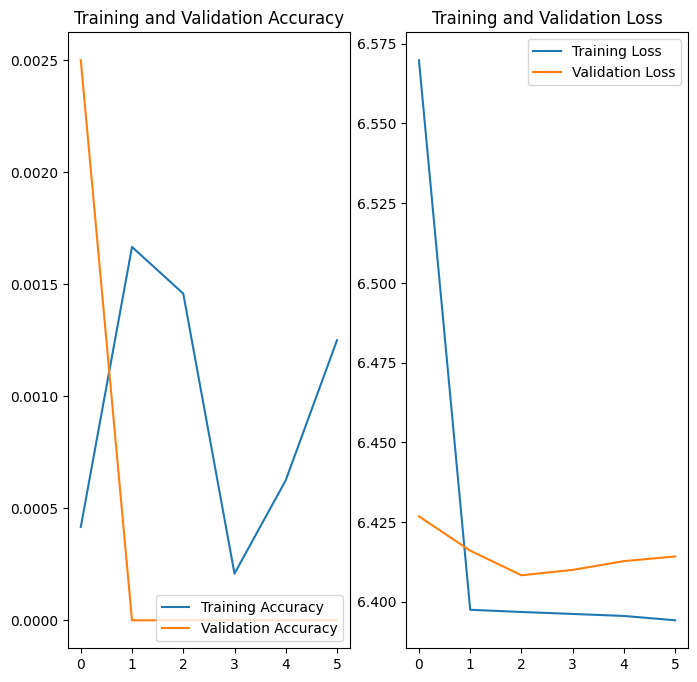

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
Predicted class: [120]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0000e+00 - loss: 6.4072
Test Loss: 6.407160758972168, Test Accuracy: 0.0


In [ ]:
# Visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

new_image_path = "/content/drive/Othercomputers/My Laptop/7/IK585-Financial_Technology/_code/prototype-palm/ROI/session1/palm1/00001.bmp"
img = tf.keras.utils.load_img(new_image_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=-1)
print(f'Predicted class: {predicted_class}')

X_eval, y_eval = next(iter(val_ds))

test_loss, test_acc = model.evaluate(X_eval, y_eval)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

# Prediction Experiment

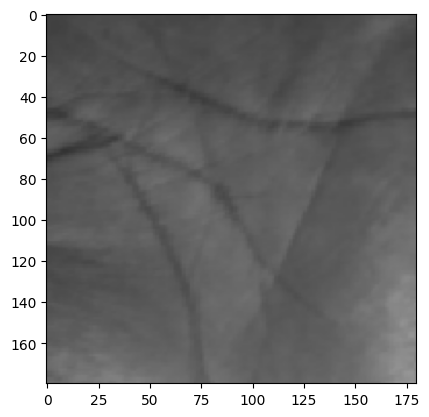

In [ ]:
# data baru
new_data_url = "/content/drive/Othercomputers/My Laptop/7/IK585-Financial_Technology/_code/prototype-palm/ROI/session2/palm1/00001.bmp"
new_data_path = pathlib.Path(new_data_url)
img = tf.keras.utils.load_img(new_data_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
plt.imshow(img_array.astype('uint8'))
plt.show()

In [ ]:
# prediksi
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
This image most likely belongs to palm378 with a 12.12 percent confidence.
